In [16]:
import itertools
import warnings
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["xtick.labelsize"] = 12
matplotlib.rcParams["ytick.labelsize"] = 12
matplotlib.rcParams["text.color"] = "k"

df = pd.read_excel("./lib/data/data.xls")

for col in df.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Country
State
Product ID
Category
Sub-Category
Sales
Quantity
Discount
Profit


In [17]:
motor = df.loc[df["Category"] == "Motor"]
print(motor["Order Date"].min())  # min date
print(motor["Order Date"].max())  # max date

2014-01-06 00:00:00
2017-12-30 00:00:00


In [18]:
cols = [
    "Row ID",
    "Order ID",
    "Ship Date",
    "Country",
    "State",
    "Product ID",
    "Category",
    "Sub-Category",
    "Quantity",
    "Discount",
    "Profit",
]

motor.drop(cols, axis ='columns', inplace=True) # we need only Order Date and Sales col data, removing other cols
motor = motor.sort_values('Order Date')

# Date Time Indexing
motor = motor.set_index('Order Date')
print(motor.index)

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)


Order Date
2014-01-06    2573.820
2014-01-07      76.728
2014-01-10      51.940
2014-01-11       9.940
2014-01-13     545.940
                ...   
2017-12-29    1207.840
2017-12-29     300.980
2017-12-29     258.750
2017-12-29     393.568
2017-12-30     323.136
Name: Sales, Length: 2121, dtype: float64


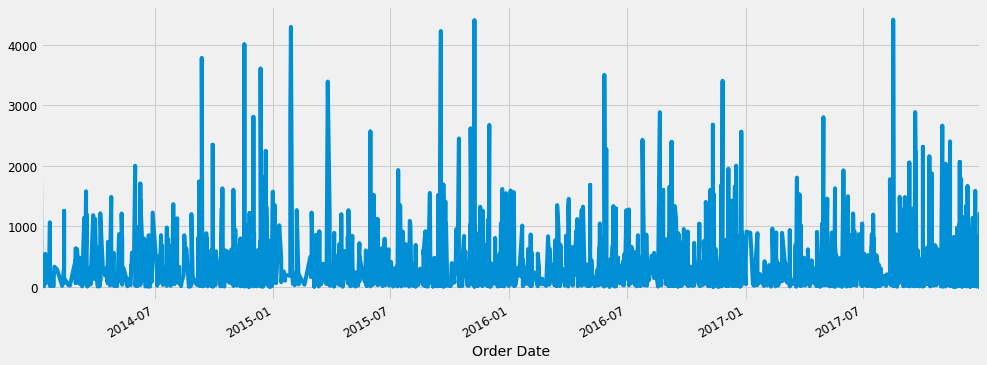

In [19]:
#plotting sales without resampling to months or any other offset 
d = motor['Sales']
print(d)

d.plot(figsize=(15,6))
plt.show()

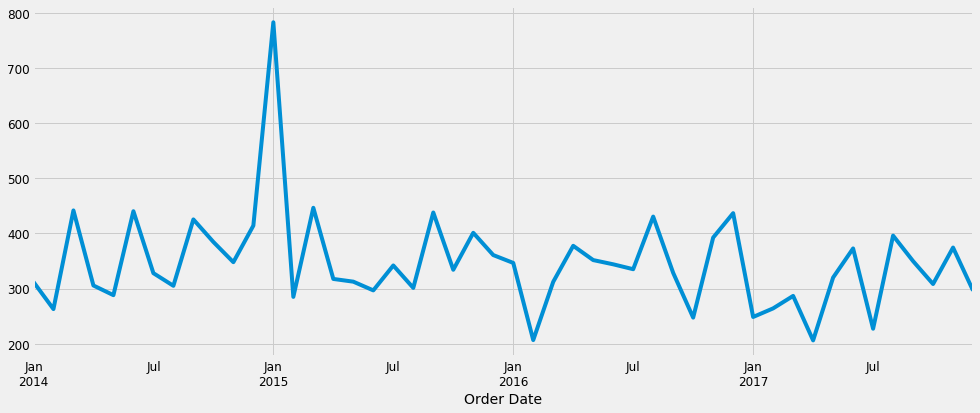

In [20]:
y = motor['Sales'].resample('MS').mean() #MS month start frequency
y.plot(figsize=(15,6))
plt.show()

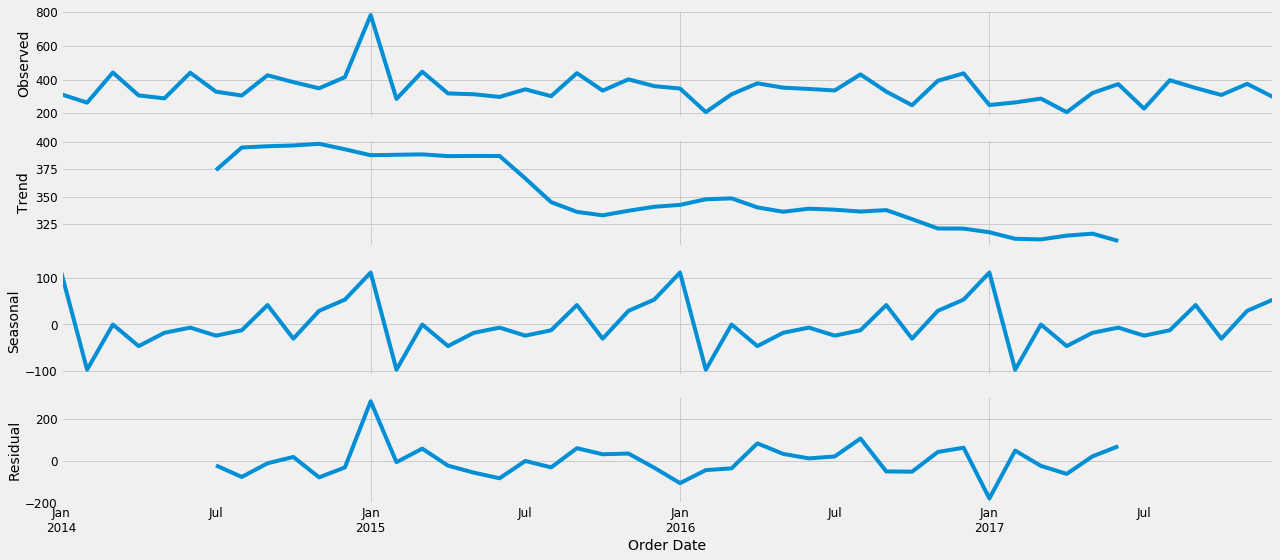

In [21]:
import pylab
#decomposing time series data into distinct components 
#trend, seasonality, noise
pylab.rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [22]:
#time series forecasting with ARIMA : Auto Regressive Integrated Moving Average
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [23]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
print(seasonal_pdq)
print('example of parameter combination for seasonal arima')
print('SARIMAX: {}X{}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {}X{}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {}X{}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {}X{}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
example of parameter combination for seasonal arima
SARIMAX: (0, 0, 1)X(0, 0, 1, 12)
SARIMAX: (0, 0, 1)X(0, 1, 0, 12)
SARIMAX: (0, 1, 0)X(0, 1, 1, 12)
SARIMAX: (0, 1, 0)X(1, 0, 0, 12)


In [24]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, 
                                            order=param, 
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA {}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

        except:
            continue

ARIMA (0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA (0, 0, 0)x(0, 0, 1, 12)12 - AIC:1439.9615951889277
ARIMA (0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.204648985923
ARIMA (0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501691
ARIMA (0, 0, 0)x(1, 0, 1, 12)12 - AIC:1429.487614970999
ARIMA (0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.44645647223496
ARIMA (0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680665961
ARIMA (0, 0, 1)x(0, 0, 1, 12)12 - AIC:2796.4888958824613
ARIMA (0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.5496453364608
ARIMA (0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.14056238897103
ARIMA (0, 0, 1)x(1, 0, 1, 12)12 - AIC:9997.616735857513
ARIMA (0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.4464066250076
ARIMA (0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.6389269697372
ARIMA (0, 1, 0)x(0, 0, 1, 12)12 - AIC:1180.3806412916922
ARIMA (0, 1, 0)x(0, 1, 0, 12)12 - AIC:433.35521367347195
ARIMA (0, 1, 0)x(1, 0, 0, 12)12 - AIC:437.4604010788974
ARIMA (0, 1, 0)x(1, 0, 1, 12)12 - AIC:1280.7516575880595
ARIMA (0, 1, 0)x(1, 1, 0, 12)12 - AIC:294.

In [25]:
#lowest AIC value is 263.937 in ARIMA (1, 1, 1)x(1, 1, 0, 12)12  
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9741   6.86e-05   9.22e+07      0.000    6323.974    6323.974


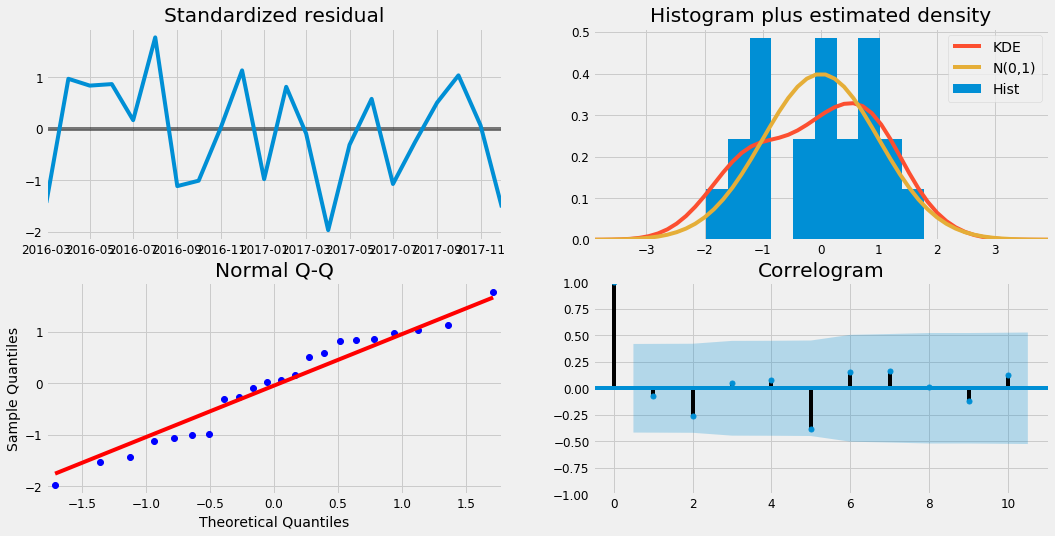

In [26]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

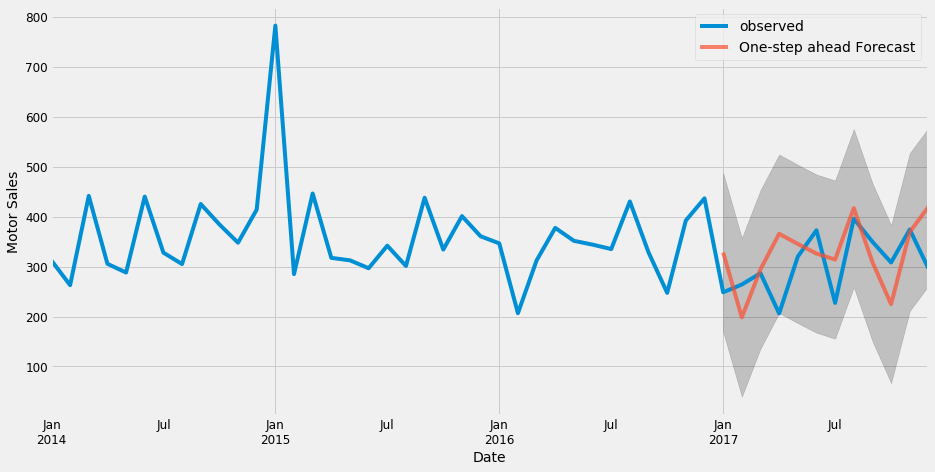

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Motor Sales')
plt.legend()
plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5911.26


In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 76.88


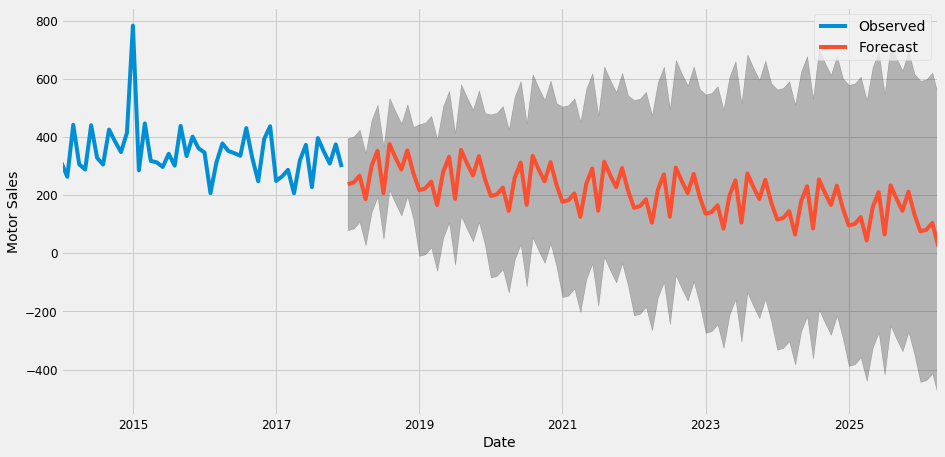

In [31]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Motor Sales')
plt.legend()
plt.show()